# Experiment 1

In [1]:
# import random
# random.seed(0)

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

import networkx as nx

In [2]:
import logging

from src.simulation import Simulation
from src.network import Network
from src.render import Render

logging.disable(logging.CRITICAL)

In [3]:
# Relative Path to Network INP File
network_file = 'networks/Net3.inp'
# Create the environment
env = Network(network_file)
# Get all the nodes in the network with degree = 1 - these will be the possible start nodes
g = env.water_network_model.to_graph().to_undirected()
deg = g.degree
start_pool = [node for node, degree in deg if degree == 1]
print(f"Start pool: {start_pool}")
print(f"Number of start nodes: {len(start_pool)}")
print(f"Number of nodes: {len(g.nodes)}")
print(f"Number of links: {len(g.edges)}")

Start pool: ['15', '35', '131', '166', '167', '203', '219', '225', '231', '243', '253', 'River', 'Lake', '1', '2', '3']
Number of start nodes: 16
Number of nodes: 97
Number of links: 119


## Create simulations
### Simulation parameters:
- env: the network environment - Net3
- num_agents: the number of agents to create - 10
- swarm: whether to use swarm intelligence - all of options will be tested
- swarm_config: the swarm configuration - all of options will be tested
- start_node: the start node for the simulation - 15 nodes from the start node pool
- max_turns: the maximum number of turns to run the simulation - 100

In [4]:
start_nodes = start_pool[:15]
num_agents = 10
max_turns = 150

print(f"Start nodes: {start_nodes}")

Start nodes: ['15', '35', '131', '166', '167', '203', '219', '225', '231', '243', '253', 'River', 'Lake', '1', '2']


### Experiment 1.1
- env: Net3
- num_agents: 10
- swarm: False
- swarm_config: None
- start_node: 15 nodes from start node pool
- max_turns: 100
- filepath: notable-results/Experiment1/NoSwarm

In [5]:
simulations_1_1 = []

for start_node in start_nodes:
    # Create the simulation
    print(f"Starting simulation with start node: {start_node}")
    sim = Simulation(env, num_agents=10, swarm=False, start_positions=[start_node], filepath="notable-results/Experiment-1/NoSwarm")
    simulations_1_1.append((start_node, sim.path_to_results_directory))
    # Run the simulation
    sim.run(max_turns=max_turns)
    
print(f"Done: {simulations_1_1}")

Starting simulation with start node: 15
Starting simulation with start node: 35
Starting simulation with start node: 131
Starting simulation with start node: 166
Starting simulation with start node: 167
Starting simulation with start node: 203
Starting simulation with start node: 219
Starting simulation with start node: 225
Starting simulation with start node: 231
Starting simulation with start node: 243
Starting simulation with start node: 253
Starting simulation with start node: River
Starting simulation with start node: Lake
Starting simulation with start node: 1
Starting simulation with start node: 2
Done: [('15', 'notable-results/Experiment-1/NoSwarm/simulation_20230322_170422'), ('35', 'notable-results/Experiment-1/NoSwarm/simulation_20230322_170423'), ('131', 'notable-results/Experiment-1/NoSwarm/simulation_20230322_170423'), ('166', 'notable-results/Experiment-1/NoSwarm/simulation_20230322_170424'), ('167', 'notable-results/Experiment-1/NoSwarm/simulation_20230322_170424'), ('2

#### Experiment 1.1.1

Examine the percentage of nodes explored by the agents.

In [6]:
# Load the results from each simulation into a dataframe
df_1_1_1 = pd.DataFrame()

for start_node, path in simulations_1_1:
    df_temp = pd.read_csv(f"{path}/results.csv")
    
    # Drop the novelty_score column
    try:
        df_temp = df_temp.drop(columns=['node_novelty_score'])
    except KeyError as e:
        print(e)
        pass
    
    try:
        df_temp = df_temp.drop(columns=['link_novelty_score'])
    except KeyError as e:
        print(e)
        pass
    
    try:
        df_temp = df_temp.drop(columns=['pct_links_explored'])
    except KeyError as e:
        print(e)
        pass
    
    # Transpose the dataframe and make the turn number the column name
    df_temp = df_temp.T
    df_temp.columns = df_temp.iloc[0].astype(int)
    df_temp = df_temp.drop(df_temp.index[0])
    
    # If this is the first iteration, create the columns of the simulations dataframe as the turn number
    if df_1_1_1.empty:
        df_1_1_1 = df_temp
        # Add a column for the start node
        df_1_1_1['start_node'] = start_node
    else:
        # Add a column for the start node
        df_temp['start_node'] = start_node
        df_1_1_1 = pd.concat([df_1_1_1, df_temp], axis=0)
        
# Create a row with the average pct_explored for each turn
df_1_1_1.loc['avg'] = df_1_1_1.mean(numeric_only=True, axis=0)
df_1_1_1.loc['max'] = df_1_1_1.max(numeric_only=True, axis=0)
df_1_1_1.loc['min'] = df_1_1_1.min(numeric_only=True, axis=0)

In [7]:
# df_1_1

#### Experiment 1.1.2

Examines the percentage of links explored by the agents.

In [8]:
# Load the results from each simulation into a dataframe
df_1_1_2 = pd.DataFrame()

for start_node, path in simulations_1_1:
    df_temp = pd.read_csv(f"{path}/results.csv")
    
    # Drop the novelty_score column
    try:
        df_temp = df_temp.drop(columns=['node_novelty_score'])
    except KeyError as e:
        print(e)
        pass
    
    try:
        df_temp = df_temp.drop(columns=['link_novelty_score'])
    except KeyError as e:
        print(e)
        pass
    
    try:
        df_temp = df_temp.drop(columns=['pct_nodes_explored'])
    except KeyError as e:
        print(e)
        pass
    
    # Transpose the dataframe and make the turn number the column name
    df_temp = df_temp.T
    df_temp.columns = df_temp.iloc[0].astype(int)
    df_temp = df_temp.drop(df_temp.index[0])
    
    # If this is the first iteration, create the columns of the simulations dataframe as the turn number
    if df_1_1_2.empty:
        df_1_1_2 = df_temp
        # Add a column for the start node
        df_1_1_2['start_node'] = start_node
    else:
        # Add a column for the start node
        df_temp['start_node'] = start_node
        df_1_1_2 = pd.concat([df_1_1_2, df_temp], axis=0)
        
# Create a row with the average pct_explored for each turn
df_1_1_2.loc['avg'] = df_1_1_2.mean(numeric_only=True, axis=0)
df_1_1_2.loc['max'] = df_1_1_2.max(numeric_only=True, axis=0)
df_1_1_2.loc['min'] = df_1_1_2.min(numeric_only=True, axis=0)

### Experiment 1.2
- env: Net3
- num_agents: 10
- swarm: True
- swarm_config: naive
- start_node: 15 nodes from start node pool
- max_turns: 100
- filepath: notable-results/Experiment1/NaiveSwarm

In [9]:
swarm_config = {'swarm': True, 'swarm_type': 'naive'}

simulations_1_2 = []

for start_node in start_nodes:
    # Create the simulation
    print(f"Starting simulation with start node: {start_node}")
    sim = Simulation(env, num_agents=10, swarm=True, swarm_config=swarm_config, start_positions=[start_node], filepath="notable-results/Experiment-1/NaiveSwarm")
    simulations_1_2.append((start_node, sim.path_to_results_directory))
    # Run the simulation
    sim.run(max_turns=max_turns)
    
print(f"Done: {simulations_1_2}")

Starting simulation with start node: 15
Starting simulation with start node: 35
Starting simulation with start node: 131
Starting simulation with start node: 166
Starting simulation with start node: 167
Starting simulation with start node: 203
Starting simulation with start node: 219
Starting simulation with start node: 225
Starting simulation with start node: 231
Starting simulation with start node: 243
Starting simulation with start node: 253
Starting simulation with start node: River
Starting simulation with start node: Lake
Starting simulation with start node: 1
Starting simulation with start node: 2
Done: [('15', 'notable-results/Experiment-1/NaiveSwarm/simulation_20230322_170430'), ('35', 'notable-results/Experiment-1/NaiveSwarm/simulation_20230322_170431'), ('131', 'notable-results/Experiment-1/NaiveSwarm/simulation_20230322_170432'), ('166', 'notable-results/Experiment-1/NaiveSwarm/simulation_20230322_170432'), ('167', 'notable-results/Experiment-1/NaiveSwarm/simulation_2023032

#### Experiment 1.2.1

Examines the percentage of nodes explored by the agents.

In [10]:
# Load the results from each simulation into a dataframe
df_1_2_1 = pd.DataFrame()

for start_node, path in simulations_1_2:
    df_temp = pd.read_csv(f"{path}/results.csv")
    
    # Drop the novelty_score column
    try:
        df_temp = df_temp.drop(columns=['node_novelty_score'])
    except KeyError as e:
        print(e)
        pass
    
    try:
        df_temp = df_temp.drop(columns=['link_novelty_score'])
    except KeyError as e:
        print(e)
        pass
    
    try:
        df_temp = df_temp.drop(columns=['pct_links_explored'])
    except KeyError as e:
        print(e)
        pass
    
    # Transpose the dataframe and make the turn number the column name
    df_temp = df_temp.T
    df_temp.columns = df_temp.iloc[0].astype(int)
    df_temp = df_temp.drop(df_temp.index[0])
    
    # If this is the first iteration, create the columns of the main dataframe as the turn number
    if df_1_2_1.empty:
        df_1_2_1 = df_temp
        # Add a column for the start node
        df_1_2_1['start_node'] = start_node
    else:
        # Add a column for the start node
        df_temp['start_node'] = start_node
        df_1_2_1 = pd.concat([df_1_2_1, df_temp], axis=0)
        
# Create a row with the average pct_explored for each turn
df_1_2_1.loc['avg'] = df_1_2_1.mean(numeric_only=True, axis=0)
df_1_2_1.loc['max'] = df_1_2_1.max(numeric_only=True, axis=0)
df_1_2_1.loc['min'] = df_1_2_1.min(numeric_only=True, axis=0)

#### Experiment 1.2.2

Examines the percentage of links explored by the agents.

In [11]:
# Load the results from each simulation into a dataframe
df_1_2_2 = pd.DataFrame()

for start_node, path in simulations_1_2:
    df_temp = pd.read_csv(f"{path}/results.csv")
    
    # Drop the novelty_score column
    try:
        df_temp = df_temp.drop(columns=['node_novelty_score'])
    except KeyError as e:
        print(e)
        pass
    
    try:
        df_temp = df_temp.drop(columns=['link_novelty_score'])
    except KeyError as e:
        print(e)
        pass
    
    try:
        df_temp = df_temp.drop(columns=['pct_nodes_explored'])
    except KeyError as e:
        print(e)
        pass
    
    # Transpose the dataframe and make the turn number the column name
    df_temp = df_temp.T
    df_temp.columns = df_temp.iloc[0].astype(int)
    df_temp = df_temp.drop(df_temp.index[0])
    
    # If this is the first iteration, create the columns of the main dataframe as the turn number
    if df_1_2_2.empty:
        df_1_2_2 = df_temp
        # Add a column for the start node
        df_1_2_2['start_node'] = start_node
    else:
        # Add a column for the start node
        df_temp['start_node'] = start_node
        df_1_2_2 = pd.concat([df_1_2_2, df_temp], axis=0)
        
# Create a row with the average pct_explored for each turn
df_1_2_2.loc['avg'] = df_1_2_2.mean(numeric_only=True, axis=0)
df_1_2_2.loc['max'] = df_1_2_2.max(numeric_only=True, axis=0)
df_1_2_2.loc['min'] = df_1_2_2.min(numeric_only=True, axis=0)

In [12]:
# df_1_2

### Experiment 1.3
- env: Net3
- num_agents: 10
- swarm: True
- swarm_config: informed, mean
- start_node: 15 nodes from start node pool
- max_turns: 100
- filepath: notable-results/Experiment1/InformedMeanSwarm

In [13]:
swarm_config = {'swarm': True, 'swarm_type': 'informed', 'allocation_threshold': 'mean'}

simulations_1_3 = []

for start_node in start_nodes:
    # Create the simulation
    print(f"Starting simulation with start node: {start_node}")
    sim = Simulation(env, num_agents=10, swarm=True, swarm_config=swarm_config, start_positions=[start_node], filepath="notable-results/Experiment-1/InformedMeanSwarm")
    simulations_1_3.append((start_node, sim.path_to_results_directory))
    # Run the simulation
    sim.run(max_turns=max_turns)
    
print(f"Done: {simulations_1_3}")

Starting simulation with start node: 15
Starting simulation with start node: 35
Starting simulation with start node: 131
Starting simulation with start node: 166
Starting simulation with start node: 167
Starting simulation with start node: 203
Starting simulation with start node: 219
Starting simulation with start node: 225
Starting simulation with start node: 231
Starting simulation with start node: 243
Starting simulation with start node: 253
Starting simulation with start node: River
Starting simulation with start node: Lake
Starting simulation with start node: 1
Starting simulation with start node: 2
Done: [('15', 'notable-results/Experiment-1/InformedMeanSwarm/simulation_20230322_170439'), ('35', 'notable-results/Experiment-1/InformedMeanSwarm/simulation_20230322_170439'), ('131', 'notable-results/Experiment-1/InformedMeanSwarm/simulation_20230322_170440'), ('166', 'notable-results/Experiment-1/InformedMeanSwarm/simulation_20230322_170441'), ('167', 'notable-results/Experiment-1/I

#### Experiment 1.3.1

Examines the percentage of nodes explored by the agents.

In [14]:
# Load the results from each simulation into a dataframe
df_1_3_1 = pd.DataFrame()

for start_node, path in simulations_1_3:
    df_temp = pd.read_csv(f"{path}/results.csv")
    
    # Drop the novelty_score column
    try:
        df_temp = df_temp.drop(columns=['node_novelty_score'])
    except KeyError as e:
        print(e)
        pass
    
    try:
        df_temp = df_temp.drop(columns=['link_novelty_score'])
    except KeyError as e:
        print(e)
        pass
    
    try:
        df_temp = df_temp.drop(columns=['pct_links_explored'])
    except KeyError as e:
        print(e)
        pass
    
    # Transpose the dataframe and make the turn number the column name
    df_temp = df_temp.T
    df_temp.columns = df_temp.iloc[0].astype(int)
    df_temp = df_temp.drop(df_temp.index[0])
    
    # If this is the first iteration, create the columns of the main dataframe as the turn number
    if df_1_3_1.empty:
        df_1_3_1 = df_temp
        # Add a column for the start node
        df_1_3_1['start_node'] = start_node
    else:
        # Add a column for the start node
        df_temp['start_node'] = start_node
        df_1_3_1 = pd.concat([df_1_3_1, df_temp], axis=0)
        
# Create a row with the average pct_explored for each turn
df_1_3_1.loc['avg'] = df_1_3_1.mean(numeric_only=True, axis=0)
df_1_3_1.loc['max'] = df_1_3_1.max(numeric_only=True, axis=0)
df_1_3_1.loc['min'] = df_1_3_1.min(numeric_only=True, axis=0)

#### Experiment 1.3.2

Examines the percentage of links explored by the agents.

In [15]:
# Load the results from each simulation into a dataframe
df_1_3_2 = pd.DataFrame()

for start_node, path in simulations_1_3:
    df_temp = pd.read_csv(f"{path}/results.csv")
    
    # Drop the novelty_score column
    try:
        df_temp = df_temp.drop(columns=['node_novelty_score'])
    except KeyError as e:
        print(e)
        pass
    
    try:
        df_temp = df_temp.drop(columns=['link_novelty_score'])
    except KeyError as e:
        print(e)
        pass
    
    try:
        df_temp = df_temp.drop(columns=['pct_nodes_explored'])
    except KeyError as e:
        print(e)
        pass
    
    # Transpose the dataframe and make the turn number the column name
    df_temp = df_temp.T
    df_temp.columns = df_temp.iloc[0].astype(int)
    df_temp = df_temp.drop(df_temp.index[0])
    
    # If this is the first iteration, create the columns of the main dataframe as the turn number
    if df_1_3_2.empty:
        df_1_3_2 = df_temp
        # Add a column for the start node
        df_1_3_2['start_node'] = start_node
    else:
        # Add a column for the start node
        df_temp['start_node'] = start_node
        df_1_3_2 = pd.concat([df_1_3_2, df_temp], axis=0)
        
# Create a row with the average pct_explored for each turn
df_1_3_2.loc['avg'] = df_1_3_2.mean(numeric_only=True, axis=0)
df_1_3_2.loc['max'] = df_1_3_2.max(numeric_only=True, axis=0)
df_1_3_2.loc['min'] = df_1_3_2.min(numeric_only=True, axis=0)

In [16]:
# df_1_3

### Experiment 1.4
- env: Net3
- num_agents: 10
- swarm: True
- swarm_config: informed, median
- start_node: 15 nodes from start node pool
- max_turns: 100
- filepath: notable-results/Experiment1/InformedMedianSwarm

In [17]:
swarm_config = {'swarm': True, 'swarm_type': 'informed', 'allocation_threshold': 'median'}

simulations_1_4 = []

for start_node in start_nodes:
    # Create the simulation
    print(f"Starting simulation with start node: {start_node}")
    sim = Simulation(env, num_agents=10, swarm=True, swarm_config=swarm_config, start_positions=[start_node], filepath="notable-results/Experiment-1/InformedMedianSwarm")
    simulations_1_4.append((start_node, sim.path_to_results_directory))
    # Run the simulation
    sim.run(max_turns=max_turns)
    
print(f"Done: {simulations_1_4}")

Starting simulation with start node: 15
Starting simulation with start node: 35
Starting simulation with start node: 131
Starting simulation with start node: 166
Starting simulation with start node: 167
Starting simulation with start node: 203
Starting simulation with start node: 219
Starting simulation with start node: 225
Starting simulation with start node: 231
Starting simulation with start node: 243
Starting simulation with start node: 253
Starting simulation with start node: River
Starting simulation with start node: Lake
Starting simulation with start node: 1
Starting simulation with start node: 2
Done: [('15', 'notable-results/Experiment-1/InformedMedianSwarm/simulation_20230322_170447'), ('35', 'notable-results/Experiment-1/InformedMedianSwarm/simulation_20230322_170447'), ('131', 'notable-results/Experiment-1/InformedMedianSwarm/simulation_20230322_170448'), ('166', 'notable-results/Experiment-1/InformedMedianSwarm/simulation_20230322_170449'), ('167', 'notable-results/Experi

#### Experiment 1.4.1

Examines the percentage of nodes explored

In [18]:
# Load the results from each simulation into a dataframe
df_1_4_1 = pd.DataFrame()

for start_node, path in simulations_1_4:
    df_temp = pd.read_csv(f"{path}/results.csv")
    
    # Drop the novelty_score column
    try:
        df_temp = df_temp.drop(columns=['node_novelty_score'])
    except KeyError as e:
        print(e)
        pass
    
    try:
        df_temp = df_temp.drop(columns=['link_novelty_score'])
    except KeyError as e:
        print(e)
        pass
    
    try:
        df_temp = df_temp.drop(columns=['pct_links_explored'])
    except KeyError as e:
        print(e)
        pass
    
    # Transpose the dataframe and make the turn number the column name
    df_temp = df_temp.T
    df_temp.columns = df_temp.iloc[0].astype(int)
    df_temp = df_temp.drop(df_temp.index[0])
    
    # If this is the first iteration, create the columns of the main dataframe as the turn number
    if df_1_4_1.empty:
        df_1_4_1 = df_temp
        # Add a column for the start node
        df_1_4_1['start_node'] = start_node
    else:
        # Add a column for the start node
        df_temp['start_node'] = start_node
        df_1_4_1 = pd.concat([df_1_4_1, df_temp], axis=0)
        
# Create a row with the average pct_explored for each turn
df_1_4_1.loc['avg'] = df_1_4_1.mean(numeric_only=True, axis=0)
df_1_4_1.loc['max'] = df_1_4_1.max(numeric_only=True, axis=0)
df_1_4_1.loc['min'] = df_1_4_1.min(numeric_only=True, axis=0)

In [19]:
# df_1_4

#### Experiment 1.4.2

Examines the percentage of links explored

In [20]:
# Load the results from each simulation into a dataframe
df_1_4_2 = pd.DataFrame()

for start_node, path in simulations_1_4:
    df_temp = pd.read_csv(f"{path}/results.csv")
    
    # Drop the novelty_score column
    try:
        df_temp = df_temp.drop(columns=['node_novelty_score'])
    except KeyError as e:
        print(e)
        pass
    
    try:
        df_temp = df_temp.drop(columns=['link_novelty_score'])
    except KeyError as e:
        print(e)
        pass
    
    try:
        df_temp = df_temp.drop(columns=['pct_nodes_explored'])
    except KeyError as e:
        print(e)
        pass
    
    # Transpose the dataframe and make the turn number the column name
    df_temp = df_temp.T
    df_temp.columns = df_temp.iloc[0].astype(int)
    df_temp = df_temp.drop(df_temp.index[0])
    
    # If this is the first iteration, create the columns of the main dataframe as the turn number
    if df_1_4_2.empty:
        df_1_4_2 = df_temp
        # Add a column for the start node
        df_1_4_2['start_node'] = start_node
    else:
        # Add a column for the start node
        df_temp['start_node'] = start_node
        df_1_4_2 = pd.concat([df_1_4_2, df_temp], axis=0)
        
# Create a row with the average pct_explored for each turn
df_1_4_2.loc['avg'] = df_1_4_2.mean(numeric_only=True, axis=0)
df_1_4_2.loc['max'] = df_1_4_2.max(numeric_only=True, axis=0)
df_1_4_2.loc['min'] = df_1_4_2.min(numeric_only=True, axis=0)

## Analysis

In [21]:
experiment1_1_results = pd.DataFrame()

experiment1_1_results['no-swarm-avg'] = df_1_1_1.loc['avg']
experiment1_1_results['no-swarm-max'] = df_1_1_1.loc['max']
experiment1_1_results['no-swarm-min'] = df_1_1_1.loc['min']

experiment1_1_results['naive-avg'] = df_1_2_1.loc['avg']
experiment1_1_results['naive-max'] = df_1_2_1.loc['max']
experiment1_1_results['naive-min'] = df_1_2_1.loc['min']

experiment1_1_results['informed-mean-avg'] = df_1_3_1.loc['avg']
experiment1_1_results['informed-mean-max'] = df_1_3_1.loc['max']
experiment1_1_results['informed-mean-min'] = df_1_3_1.loc['min']

experiment1_1_results['informed-median-avg'] = df_1_4_1.loc['avg']
experiment1_1_results['informed-median-max'] = df_1_4_1.loc['max']
experiment1_1_results['informed-median-min'] = df_1_4_1.loc['min']

experiment1_1_results.drop(index='start_node', inplace=True)

experiment1_1_results.head()

,no-swarm-avg,no-swarm-max,no-swarm-min,naive-avg,naive-max,naive-min,informed-mean-avg,informed-mean-max,informed-mean-min,informed-median-avg,informed-median-max,informed-median-min
turn,,,,,,,,,,,,
0,1.030928,1.030928,1.030928,1.030928,1.030928,1.030928,1.030928,1.030928,1.030928,1.030928,1.030928,1.030928
1,2.061856,2.061856,2.061856,3.71134,4.123711,3.092784,4.054983,5.154639,3.092784,4.054983,5.154639,3.092784
2,2.955326,3.092784,2.061856,6.04811,7.216495,5.154639,6.04811,9.278351,4.123711,6.185567,9.278351,4.123711
3,3.848797,4.123711,3.092784,7.972509,10.309278,6.185567,8.659794,13.402062,5.154639,8.797251,13.402062,5.154639
4,4.742268,5.154639,3.092784,9.484536,12.371134,7.216495,11.958763,18.556701,6.185567,12.09622,18.556701,6.185567


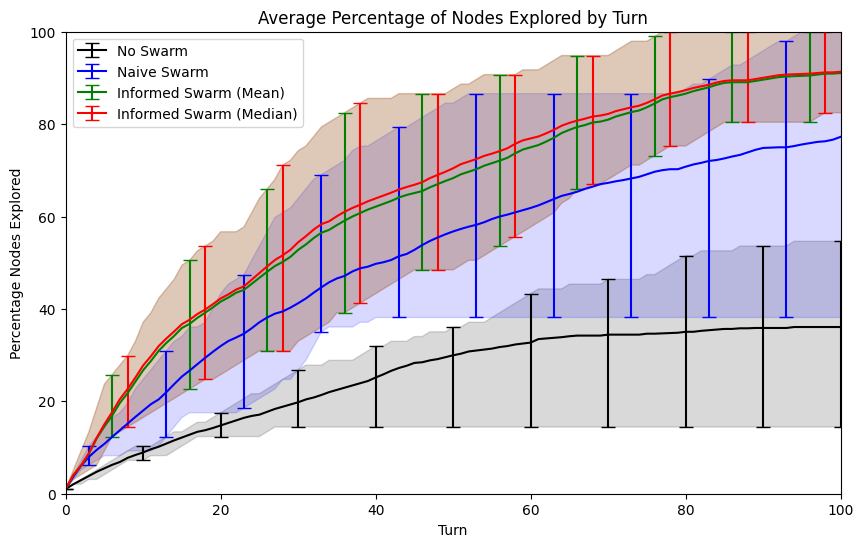

In [22]:
# Plot the avg results for each swarm type as a function of turns
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the no swarm results with error bars
ax.errorbar(
    experiment1_1_results.index,
    experiment1_1_results['no-swarm-avg'],
    yerr=[experiment1_1_results['no-swarm-avg'] - experiment1_1_results['no-swarm-min'], experiment1_1_results['no-swarm-max'] - experiment1_1_results['no-swarm-avg']],
    errorevery=(0,10),
    label='No Swarm',
    color='black',
    capsize=5)

# Plot the naive swarm results with error bars
ax.errorbar(
    experiment1_1_results.index,
    experiment1_1_results['naive-avg'],
    yerr=[experiment1_1_results['naive-avg'] - experiment1_1_results['naive-min'], experiment1_1_results['naive-max'] - experiment1_1_results['naive-avg']],
    errorevery=(3,10),
    label='Naive Swarm',
    color='blue',
    capsize=5)

# Plot the informed swarm results
ax.errorbar(
    experiment1_1_results.index, 
    experiment1_1_results['informed-mean-avg'], 
    yerr=[experiment1_1_results['informed-mean-avg'] - experiment1_1_results['informed-mean-min'], experiment1_1_results['informed-mean-max'] - experiment1_1_results['informed-mean-avg']], 
    errorevery=(6,10),
    label='Informed Swarm (Mean)', 
    color='green',
    capsize=5)

# Plot the informed swarm results
ax.errorbar(
    experiment1_1_results.index, 
    experiment1_1_results['informed-median-avg'], 
    yerr=[experiment1_1_results['informed-median-avg'] - experiment1_1_results['informed-median-min'], experiment1_1_results['informed-median-max'] - experiment1_1_results['informed-median-avg']], 
    errorevery=(8,10),
    label='Informed Swarm (Median)', 
    color='red',
    capsize=5)

# Function to fill in the area between the error bars
def fill_area_between_min_and_max(swarm_type, colour=None, alpha=0.3):
    x = experiment1_1_results.index.astype(int)
    y1 = experiment1_1_results[f'{swarm_type}-min'].astype(float)
    y2 = experiment1_1_results[f'{swarm_type}-max'].astype(float)
    
    if colour is None:
        colour = 'lightblue'
        
    ax.fill_between(x, y1, y2, color=colour, alpha=alpha)
    
# Fill in the area between the error bars for the no swarm
fill_area_between_min_and_max('no-swarm', colour='black', alpha=0.15)

# Fill in the area between the error bars for the naive swarm
fill_area_between_min_and_max('naive', colour='blue', alpha=0.15)

# Fill in the area between the error bars for the informed swarm (mean)
fill_area_between_min_and_max('informed-mean', colour='green', alpha=0.15)

# Fill in the area between the error bars for the informed swarm (median)
fill_area_between_min_and_max('informed-median', colour='red', alpha=0.15)
    

# Set the title and labels
ax.set_title("Average Percentage of Nodes Explored by Turn")
ax.set_xlabel("Turn")
ax.set_ylabel("Percentage Nodes Explored")

# Set the legend
ax.legend()

# Set the y axis to be between 0 and 100
ax.set_ylim(0, 100)

# Set the x axis to be between 0 and 100
ax.set_xlim(0, 100)

# Show the plot
plt.show()

In [23]:
experiment1_2_results = pd.DataFrame()

experiment1_2_results['no-swarm-avg'] = df_1_1_2.loc['avg']
experiment1_2_results['no-swarm-max'] = df_1_1_2.loc['max']
experiment1_2_results['no-swarm-min'] = df_1_1_2.loc['min']

experiment1_2_results['naive-avg'] = df_1_2_2.loc['avg']
experiment1_2_results['naive-max'] = df_1_2_2.loc['max']
experiment1_2_results['naive-min'] = df_1_2_2.loc['min']

experiment1_2_results['informed-mean-avg'] = df_1_3_2.loc['avg']
experiment1_2_results['informed-mean-max'] = df_1_3_2.loc['max']
experiment1_2_results['informed-mean-min'] = df_1_3_2.loc['min']

experiment1_2_results['informed-median-avg'] = df_1_4_2.loc['avg']
experiment1_2_results['informed-median-max'] = df_1_4_2.loc['max']
experiment1_2_results['informed-median-min'] = df_1_4_2.loc['min']

experiment1_2_results.drop(index='start_node', inplace=True)

experiment1_2_results.head()

,no-swarm-avg,no-swarm-max,no-swarm-min,naive-avg,naive-max,naive-min,informed-mean-avg,informed-mean-max,informed-mean-min,informed-median-avg,informed-median-max,informed-median-min
turn,,,,,,,,,,,,
0,0.840336,0.840336,0.840336,0.840336,0.840336,0.840336,0.840336,0.840336,0.840336,0.840336,0.840336,0.840336
1,1.680672,1.680672,1.680672,2.184874,2.521008,1.680672,2.464986,3.361345,1.680672,2.464986,3.361345,1.680672
2,2.408964,2.521008,1.680672,4.42577,5.882353,3.361345,4.313725,6.722689,3.361345,4.42577,6.722689,3.361345
3,3.137255,3.361345,2.521008,6.218487,8.403361,4.201681,6.610644,10.92437,4.201681,6.778711,10.92437,4.201681
4,3.865546,4.201681,2.521008,7.843137,10.92437,5.042017,9.467787,15.12605,5.042017,9.635854,15.12605,5.042017


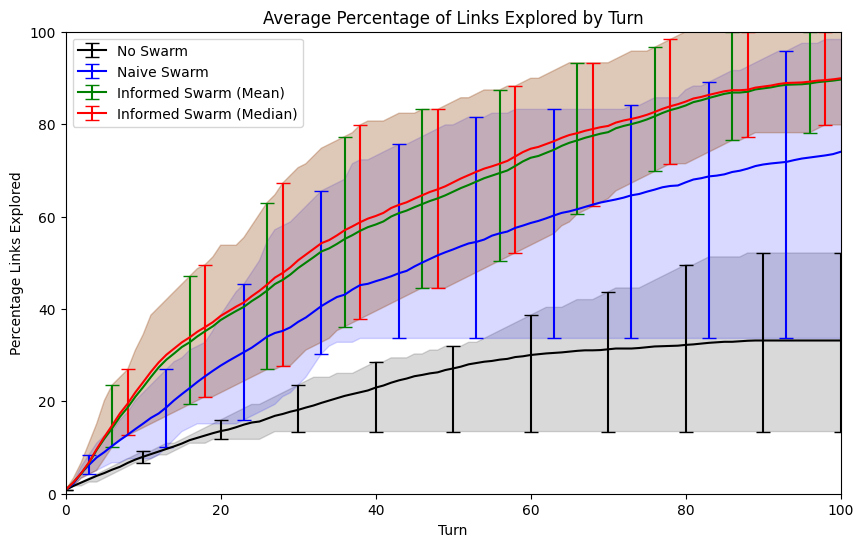

In [24]:
# Plot the avg results for each swarm type as a function of turns
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the no swarm results with error bars
ax.errorbar(
    experiment1_2_results.index,
    experiment1_2_results['no-swarm-avg'],
    yerr=[experiment1_2_results['no-swarm-avg'] - experiment1_2_results['no-swarm-min'], experiment1_2_results['no-swarm-max'] - experiment1_2_results['no-swarm-avg']],
    errorevery=(0,10),
    label='No Swarm',
    color='black',
    capsize=5)

# Plot the naive swarm results with error bars
ax.errorbar(
    experiment1_2_results.index,
    experiment1_2_results['naive-avg'],
    yerr=[experiment1_2_results['naive-avg'] - experiment1_2_results['naive-min'], experiment1_2_results['naive-max'] - experiment1_2_results['naive-avg']],
    errorevery=(3,10),
    label='Naive Swarm',
    color='blue',
    capsize=5)

# Plot the informed swarm results
ax.errorbar(
    experiment1_2_results.index, 
    experiment1_2_results['informed-mean-avg'], 
    yerr=[experiment1_2_results['informed-mean-avg'] - experiment1_2_results['informed-mean-min'], experiment1_2_results['informed-mean-max'] - experiment1_2_results['informed-mean-avg']], 
    errorevery=(6,10),
    label='Informed Swarm (Mean)', 
    color='green',
    capsize=5)

# Plot the informed swarm results
ax.errorbar(
    experiment1_2_results.index, 
    experiment1_2_results['informed-median-avg'], 
    yerr=[experiment1_2_results['informed-median-avg'] - experiment1_2_results['informed-median-min'], experiment1_2_results['informed-median-max'] - experiment1_2_results['informed-median-avg']], 
    errorevery=(8,10),
    label='Informed Swarm (Median)', 
    color='red',
    capsize=5)

# Function to fill in the area between the error bars
def fill_area_between_min_and_max(swarm_type, colour=None, alpha=0.3):
    x = experiment1_2_results.index.astype(int)
    y1 = experiment1_2_results[f'{swarm_type}-min'].astype(float)
    y2 = experiment1_2_results[f'{swarm_type}-max'].astype(float)
    
    if colour is None:
        colour = 'lightblue'
        
    ax.fill_between(x, y1, y2, color=colour, alpha=alpha)
    
# Fill in the area between the error bars for the no swarm
fill_area_between_min_and_max('no-swarm', colour='black', alpha=0.15)

# Fill in the area between the error bars for the naive swarm
fill_area_between_min_and_max('naive', colour='blue', alpha=0.15)

# Fill in the area between the error bars for the informed swarm (mean)
fill_area_between_min_and_max('informed-mean', colour='green', alpha=0.15)

# Fill in the area between the error bars for the informed swarm (median)
fill_area_between_min_and_max('informed-median', colour='red', alpha=0.15)
    

# Set the title and labels
ax.set_title("Average Percentage of Links Explored by Turn")
ax.set_xlabel("Turn")
ax.set_ylabel("Percentage Links Explored")

# Set the legend
ax.legend()

# Set the y axis to be between 0 and 100
ax.set_ylim(0, 100)

# Set the x axis to be between 0 and 100
ax.set_xlim(0, 100)

# Show the plot
plt.show()

In [25]:
# # Calculate the mean percentage explored for each swarm type across all turns

# # No swarm
# no_swarm_mean = experiment1_1_results['no-swarm-avg'].mean()

# # Naive swarm
# naive_swarm_mean = experiment1_1_results['naive-avg'].mean()

# # Informed swarm (mean)
# informed_swarm_mean_mean = experiment1_1_results['informed-mean-avg'].mean()

# # Informed swarm (median)
# informed_swarm_mean_median = experiment1_1_results['informed-median-avg'].mean()

# # Create a dataframe to store the results
# experiment1_results_mean = pd.DataFrame()
# # Add the results to the dataframe
# experiment1_results_mean['no-swarm'] = [no_swarm_mean]
# experiment1_results_mean['naive-swarm'] = [naive_swarm_mean]
# experiment1_results_mean['informed-swarm-mean'] = [informed_swarm_mean_mean]
# experiment1_results_mean['informed-swarm-median'] = [informed_swarm_mean_median]

# # Plot the results
# fig, ax = plt.subplots(figsize=(10, 6))

# # Plot the results
# ax.bar(
#     experiment1_results_mean.columns,
#     experiment1_results_mean.loc[0],
#     color=['black', 'blue', 'green', 'red'])

# # Set the title and labels
# ax.set_title("Average Percentage Explored")
# ax.set_xlabel("Swarm Type")
# ax.set_ylabel("Percentage Explored")

# # Set the y axis to be between 0 and 100
# ax.set_ylim(0, 100)

# # Show the plot
# plt.show()


In [26]:
# # Do an ANOVA test to see if there is a significant difference between the swarm types
# anova_results = stats.f_oneway(
#     experiment1_1_results['no-swarm-avg'].astype(float),
#     experiment1_1_results['naive-avg'].astype(float),
#     experiment1_1_results['informed-mean-avg'].astype(float),
#     experiment1_1_results['informed-median-avg'].astype(float))

# # Print the results
# print(anova_results)

# # Do a Kruskal-Wallis test to see if there is a significant difference between the swarm types
# kruskal_results = stats.kruskal(
#     experiment1_1_results['no-swarm-avg'].astype(float),
#     experiment1_1_results['naive-avg'].astype(float),
#     experiment1_1_results['informed-mean-avg'].astype(float),
#     experiment1_1_results['informed-median-avg'].astype(float))

# print(kruskal_results)

# # Do a Tukey's test to see which swarm types are significantly different
# tukey_results = stats.tukey_hsd(
#     experiment1_1_results['no-swarm-avg'].astype(float),
#     experiment1_1_results['naive-avg'].astype(float),
#     experiment1_1_results['informed-mean-avg'].astype(float),
#     experiment1_1_results['informed-median-avg'].astype(float))

# # Print the results
# print(tukey_results)

In [27]:
# # Plot the avg results for each swarm type as a function of turns
# fig, ax = plt.subplots(figsize=(10, 6))

# # Plot the no swarm results
# ax.plot(
#     experiment1_1_results.index,
#     experiment1_1_results['no-swarm-avg'],
#     label='No Swarm (Avg)',
#     color='black')

# ax.plot(
#     experiment1_1_results.index,
#     experiment1_1_results['no-swarm-min'],
#     color='black',
#     linestyle='dashed')

# ax.plot(
#     experiment1_1_results.index,
#     experiment1_1_results['no-swarm-max'],
#     color='black',
#     linestyle='dashed')

# # Plot the naive swarm results
# ax.plot(
#     experiment1_1_results.index,
#     experiment1_1_results['naive-avg'],
#     label='Naive Swarm (Avg)',
#     color='blue')

# ax.plot(
#     experiment1_1_results.index,
#     experiment1_1_results['naive-min'],
#     color='blue',
#     linestyle='dashed')

# ax.plot(
#     experiment1_1_results.index,
#     experiment1_1_results['naive-max'],
#     color='blue',
#     linestyle='dashed')

# # Plot the informed swarm results
# ax.plot(
#     experiment1_1_results.index,
#     experiment1_1_results['informed-mean-avg'],
#     label='Informed Swarm (Mean) (Avg)',
#     color='green')

# ax.plot(
#     experiment1_1_results.index,
#     experiment1_1_results['informed-mean-min'],
#     color='green',
#     linestyle='dashed')

# ax.plot(
#     experiment1_1_results.index,
#     experiment1_1_results['informed-mean-max'],
#     color='green',
#     linestyle='dashed')

# # Plot the informed swarm results
# ax.plot(
#     experiment1_1_results.index,
#     experiment1_1_results['informed-median-avg'],
#     label='Informed Swarm (Median) (Avg)',
#     color='red')

# ax.plot(
#     experiment1_1_results.index,
#     experiment1_1_results['informed-median-min'],
#     color='red',
#     linestyle='dashed')

# ax.plot(
#     experiment1_1_results.index,
#     experiment1_1_results['informed-median-max'],
#     color='red',
#     linestyle='dashed')

# # Function to fill in the area between the min and max for a given swarm type
# def fill_area_between_min_and_max(swarm_type, colour=None, alpha=0.3):
#     x = experiment1_1_results.index.astype(int)
#     y1 = experiment1_1_results[f'{swarm_type}-min'].astype(float)
#     y2 = experiment1_1_results[f'{swarm_type}-max'].astype(float)
    
#     if colour is None:
#         colour = 'lightblue'
        
#     ax.fill_between(x, y1, y2, alpha=0.25, color=colour)

# # Fill in the area between the min and max for the no swarm
# fill_area_between_min_and_max('no-swarm', colour='black', alpha=0.25)

# # Fill in the area between the min and max for the naive swarm
# fill_area_between_min_and_max('naive', colour='blue', alpha=0.25)

# # Fill in the area between the min and max for the informed swarm (mean)
# fill_area_between_min_and_max('informed-mean', colour='green', alpha=0.25)

# # Fill in the area between the min and max for the informed swarm (median)
# fill_area_between_min_and_max('informed-median', colour='red', alpha=0.25)

# # Set the title and labels
# ax.set_title("Average Percentage Explored by Turn")
# ax.set_xlabel("Turn")
# ax.set_ylabel("Percentage Explored")

# # Set the legend
# ax.legend()

# # Set the y axis to be between 0 and 100
# ax.set_ylim(0, 100)

# # Set the x axis to be between 0 and 100
# ax.set_xlim(0, 100)

# # Show the plot
# # plt.show()

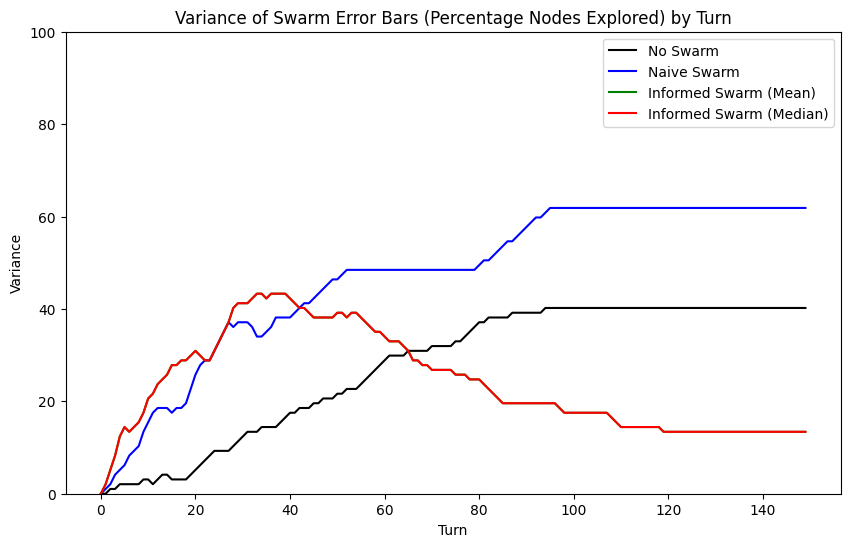

In [28]:
# Get the variance of the swarm error bars for each swarm type as a function of turns
no_swarm_var, naive_swarm_var, informed_mean_var, informed_median_var = pd.Series(dtype=float), pd.Series(dtype=float), pd.Series(dtype=float), pd.Series(dtype=float)
no_swarm_var = experiment1_1_results['no-swarm-max'] - experiment1_1_results['no-swarm-min']
naive_swarm_var = experiment1_1_results['naive-max'] - experiment1_1_results['naive-min']
informed_mean_var = experiment1_1_results['informed-mean-max'] - experiment1_1_results['informed-mean-min']
informed_median_var = experiment1_1_results['informed-median-max'] - experiment1_1_results['informed-median-min']

# Plot the variance of the swarm error bars for each swarm type as a function of turns
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the no swarm results
ax.plot(
    experiment1_1_results.index,
    no_swarm_var,
    label='No Swarm',
    color='black')

# Plot the naive swarm results
ax.plot(
    experiment1_1_results.index,
    naive_swarm_var,
    label='Naive Swarm',
    color='blue')

# Plot the informed (mean) swarm results
ax.plot(
    experiment1_1_results.index,
    informed_mean_var,
    label='Informed Swarm (Mean)',
    color='green')

# Plot the informed (median) swarm results
ax.plot(
    experiment1_1_results.index,
    informed_median_var,
    label='Informed Swarm (Median)',
    color='red')

# Set the title and labels
ax.set_title("Variance of Swarm Error Bars (Percentage Nodes Explored) by Turn")
ax.set_xlabel("Turn")
ax.set_ylabel("Variance")

# Set the legend
ax.legend()

# Set the y axis to be between 0 and 100
ax.set_ylim(0, 100)

# Show the plot
plt.show()

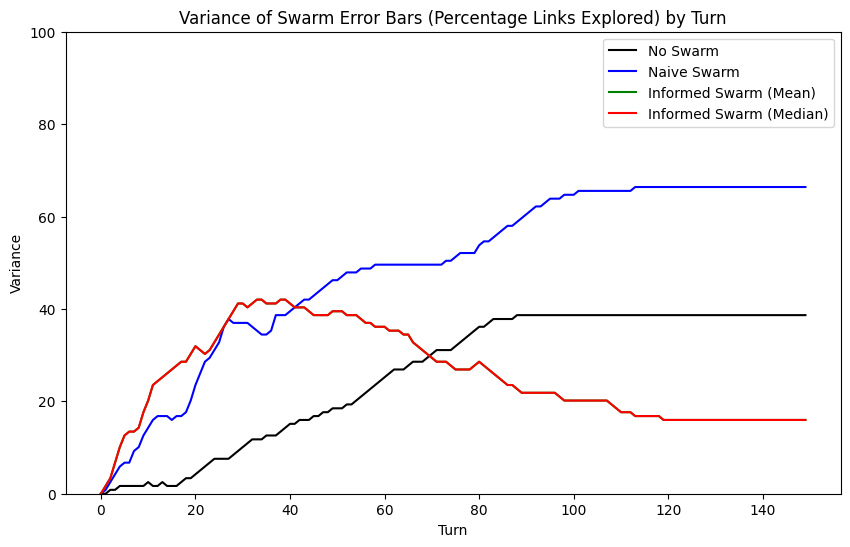

In [29]:
# Get the variance of the swarm error bars for each swarm type as a function of turns
no_swarm_var, naive_swarm_var, informed_mean_var, informed_median_var = pd.Series(dtype=float), pd.Series(dtype=float), pd.Series(dtype=float), pd.Series(dtype=float)
no_swarm_var = experiment1_2_results['no-swarm-max'] - experiment1_2_results['no-swarm-min']
naive_swarm_var = experiment1_2_results['naive-max'] - experiment1_2_results['naive-min']
informed_mean_var = experiment1_2_results['informed-mean-max'] - experiment1_2_results['informed-mean-min']
informed_median_var = experiment1_2_results['informed-median-max'] - experiment1_2_results['informed-median-min']

# Plot the variance of the swarm error bars for each swarm type as a function of turns
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the no swarm results
ax.plot(
    experiment1_2_results.index,
    no_swarm_var,
    label='No Swarm',
    color='black')

# Plot the naive swarm results
ax.plot(
    experiment1_2_results.index,
    naive_swarm_var,
    label='Naive Swarm',
    color='blue')

# Plot the informed (mean) swarm results
ax.plot(
    experiment1_2_results.index,
    informed_mean_var,
    label='Informed Swarm (Mean)',
    color='green')

# Plot the informed (median) swarm results
ax.plot(
    experiment1_2_results.index,
    informed_median_var,
    label='Informed Swarm (Median)',
    color='red')

# Set the title and labels
ax.set_title("Variance of Swarm Error Bars (Percentage Links Explored) by Turn")
ax.set_xlabel("Turn")
ax.set_ylabel("Variance")

# Set the legend
ax.legend()

# Set the y axis to be between 0 and 100
ax.set_ylim(0, 100)

# Show the plot
plt.show()